#Assignment 2 - DA24C026

In [597]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import log
from sklearn import linear_model

#comment below if not using ipython notebook
%matplotlib inline

In [598]:
data  = pd.read_csv('Assignment2.data', sep='\t')
data.head()

,SpringPos,StockPrice
0,2.27,3.48
1,6.38,2.99
2,8.61,5.86
3,8.65,1.79
4,13.17,3.47


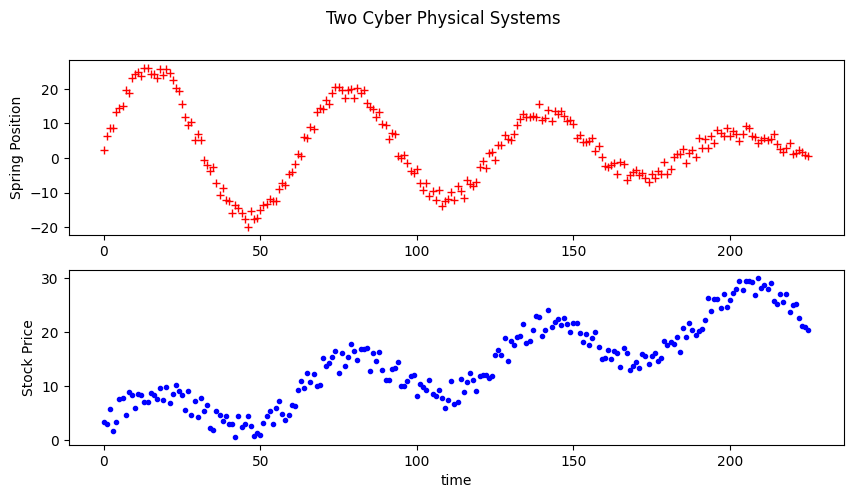

In [599]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Two Cyber Physical Systems')
fig.set_figwidth(10)
fig.set_figheight(5)

ax1.plot(data.SpringPos, 'r+')
ax1.set_ylabel('Spring Position')
ax2.plot(data.StockPrice, 'b.')
ax2.set_ylabel('Stock Price')
ax2.set_xlabel('time')

plt.show()

In [600]:
#IMP functions
def estimateBeta(X, y):
    numerator = np.matmul(np.transpose(X), y)
    denom = np.matmul(np.transpose(X), X)
    denom_inv = np.linalg.inv(denom)
    beta = np.matmul(denom_inv, numerator)
    return beta

# create a helper that would estimate yhat from X and beta.
def predict(beta, X):
    # reshape the input to a matrix, if it is appearing like an 1d array.
    if len(X.shape) != 2:
        X = np.expand_dims(X,1)
    # convert the beta list in to an array.
    beta = np.array(beta)
    # perform estimation of yhat.
    return np.matmul(X, beta)

# compute the sum of squared error between y and yhat.
def SSE(y, yhat):
    return np.sum((y-yhat)**2)

##Task 1 - Part 1

In [601]:
df = pd.DataFrame({"x":range(226), "y":data.StockPrice})
df.head()

,x,y
0,0,3.48
1,1,2.99
2,2,5.86
3,3,1.79
4,4,3.47


Linear Model using OLS method without Intercept (Discussed in Class)

In [602]:
yy = np.array(df.y)
xx = np.expand_dims(df.x, 1)

In [603]:
beta = estimateBeta(xx, yy)

In [604]:
y_hat = predict(beta, xx)

In [605]:
sse = SSE(yy, y_hat)

In [606]:
print(sse)

3850.335433080234


Text(0.5, 0, 'Time')

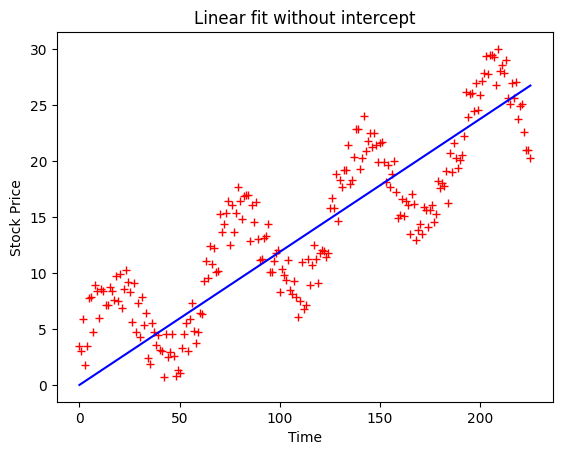

In [607]:
plt.plot(df.x, df.y, 'r+')
plt.plot(df.x, y_hat, 'b-')
plt.title("Linear fit without intercept")
plt.ylabel('Stock Price')
plt.xlabel('Time')

OLS Method for Linear model with Intercept (StockPrice) - Discused in Class

In [608]:
df2 = pd.DataFrame({"bias":np.ones(226), "x":range(226), "y":data.StockPrice})
yy = np.array(df2.y)
xx = np.array(df2[["bias","x"]])
df2.head()

,bias,x,y
0,1.0,0,3.48
1,1.0,1,2.99
2,1.0,2,5.86
3,1.0,3,1.79
4,1.0,4,3.47


In [609]:
beta2 = estimateBeta(xx, yy)

In [610]:
y_hat2 = predict(beta2, xx)

In [611]:
sse2 = SSE(yy, y_hat2)

In [612]:
print(sse2)

3274.298469663405


Text(0.5, 0, 'Time')

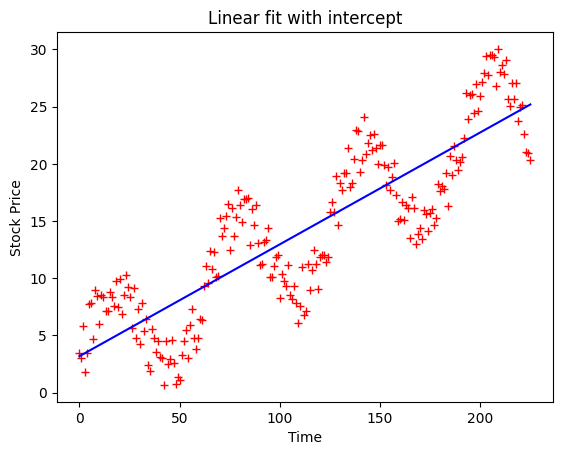

In [613]:
plt.plot(df2.x, df2.y, 'r+')
pl2 = plt.plot(df2.x, y_hat2, 'b-')
plt.title("Linear fit with intercept")
plt.ylabel('Stock Price')
plt.xlabel('Time')

##Task 1 - Part 2

SSE values for random thetas

In [614]:
l = [x for x in range(0,61,5)]

In [615]:
theta_radians = np.radians(l)

In [616]:
beta_values = np.tan(theta_radians)

In [617]:
beta_array = np.array(beta_values)
reshaped_array = beta_array.reshape(-1, 1)

In [618]:
sse3 = []
predictions = []
for i in reshaped_array:
  yhat3 = predict(i, df2.x)
  predictions.append(yhat3)
  loss = SSE(yy, yhat3)
  sse3.append(loss)

In [619]:
print(sse3)

[57971.5195, 7644.253463286041, 16414.204300757367, 88656.38097289258, 233234.64823709434, 464912.6864159496, 806862.9417290995, 1295032.4609382832, 1985872.5235785348, 2970551.8794999984, 4402516.076549392, 6554700.170409569, 9949095.786187291]


In [620]:
# As the range of losses is too high, log is used to plot them on a compareable scale
sse4 = []
for i in sse3:
  sse4.append(np.log(i))

In [621]:
print(sse4)

[10.967707125823962, 8.941709463272762, 9.705902354850187, 11.392523288301613, 12.359800299767985, 13.04960489578979, 13.600909096061274, 14.074046319163228, 14.501568934003751, 14.904258311530322, 15.297686771032234, 15.695692933540299, 16.11299222924525]


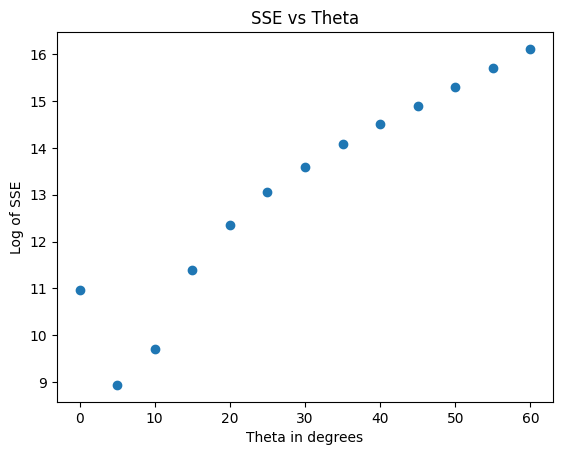

In [622]:
plt.scatter(l,sse4)
plt.xlabel('Theta in degrees')
plt.ylabel('Log of SSE')
plt.title('SSE vs Theta')
plt.show()

In [623]:
# Conclusion - Model with Theta = 5 Degrees has the minimum SSE of 7644 Approx

Visulaizing models with different Thetas

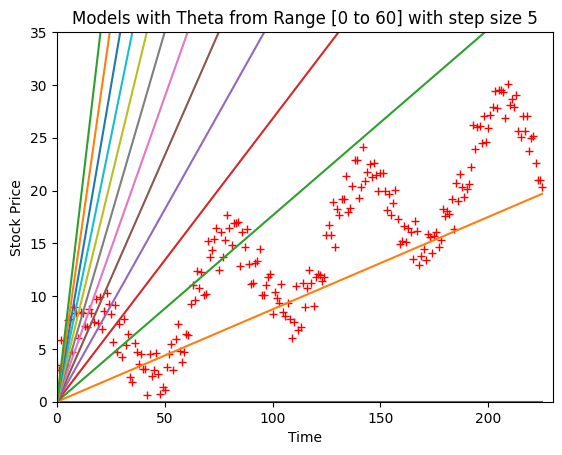

In [624]:
plt.plot(df2.x, df2.y, 'r+')
for i in range(len(predictions)):
  plt.plot(df2.x, predictions[i])
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.title('Models with Theta from Range [0 to 60] with step size 5')
plt.ylim(0,35)
plt.xlim(0,230)
plt.show()

##Task 1 - Part 3

Extracting slope of Linear Model through LinearRegression function from sklearn

In [625]:
from sklearn.linear_model import LinearRegression

In [626]:
model = LinearRegression()

In [627]:
x_train = df2[['x']]
y_train = df2['y']

In [628]:
model.fit(x_train, y_train)

LinearRegression()

In [629]:
coefficients = model.coef_
intercept = model.intercept_

In [630]:
coefficients = print( "SLOPE:", model.coef_[0])
intercept = print("Intercept: ", model.intercept_)

SLOPE: 0.09782484893376478
Intercept:  3.1824478577833197


In [631]:
y_hat3 = model.predict(x_train)

In [632]:
sse5 = SSE(y_train, y_hat3)

In [633]:
print(sse5)

3274.298469663405


##Task 1 - Part 4

Comparing SSE values obtained from different approcahes



1.   SSE obtained using LinearRegression function is same as OLS method with intercept. (SSE = 3274.298469663405)
2.   For various theta values SSE is least for theta = 5 degrees. (SSE = 7644.253463286041)

Conclusion - The SSE for a linear function is lesser in "OLS with intercept" than "tan 5 degree model"
becuase the ideal model will have theta value around (6).


##Task 2

AIM - To implement Mathematical Regression Model for Stock Price with lower SSE than Task 1 (capturing Peroidicity) using Feature transformation and Polynomial Features - (Discussed in Class)

In [709]:
#Feature Transformation for sin fit

x1 = round(df2.x*beta2[1],2)
x2 = np.sin(x1)
df21 = pd.DataFrame({"bias":np.ones(226),"x":range(226), "x1":x1, "x2":x2, "y":data.StockPrice})
df21.head(10)

,bias,x,x1,x2,y
0,1.0,0,0.00,0.000000,3.48
1,1.0,1,0.10,0.099833,2.99
2,1.0,2,0.20,0.198669,5.86
3,1.0,3,0.29,0.285952,1.79
4,1.0,4,0.39,0.380188,3.47
5,1.0,5,0.49,0.470626,7.73
6,1.0,6,0.59,0.556361,7.83
7,1.0,7,0.68,0.628793,4.70
8,1.0,8,0.78,0.703279,8.97
9,1.0,9,0.88,0.770739,8.43


In [710]:
xx = np.array(df21[['bias', 'x1', 'x2']])
yy = np.array(df21.y)

In [711]:
beta3 = estimateBeta(xx, yy)
print(beta3)
yhat4 = predict(beta3, xx)
loss = SSE(yy, yhat4)
print(loss)

[2.74436632 1.00020159 4.82388129]
701.3625743495965


Text(0.5, 0, 'Time')

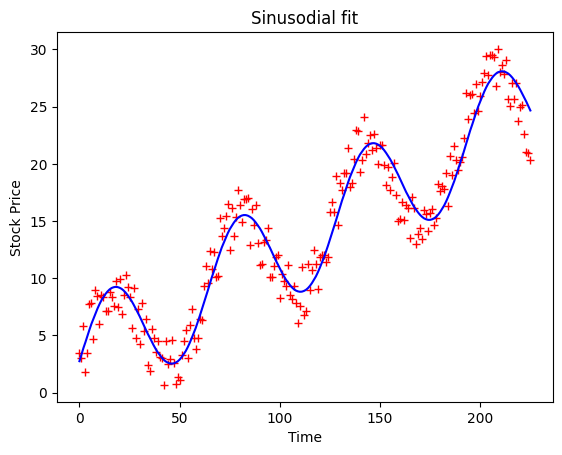

In [637]:
plt.plot(df2.x, df2.y, 'r+')
plt.plot(df2.x, yhat4, 'b-')
plt.title("Sinusodial fit")
plt.ylabel('Stock Price')
plt.xlabel('Time')

In [638]:
xx = np.array(df21[['x1']])
yy = np.array(df2.y)

In [639]:
# Polynomial fit
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 10)   # 10, 11 hyperparameter
X_poly = poly_transformer.fit_transform(xx)

In [640]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_poly, yy)
print("Intercept=", model.intercept_, "Beta = ", model.coef_)
yhat5 = model.predict(X_poly)

Intercept= 4.889491693705528 Beta =  [ 0.00000000e+00 -9.86993809e+00  2.63459056e+01 -1.90575021e+01
  6.32030184e+00 -1.14971851e+00  1.24286666e-01 -8.19847572e-03
  3.23849727e-04 -7.03798268e-06  6.47062066e-08]


In [641]:
loss = SSE(yy, yhat5)
print(loss)

758.3498549536571


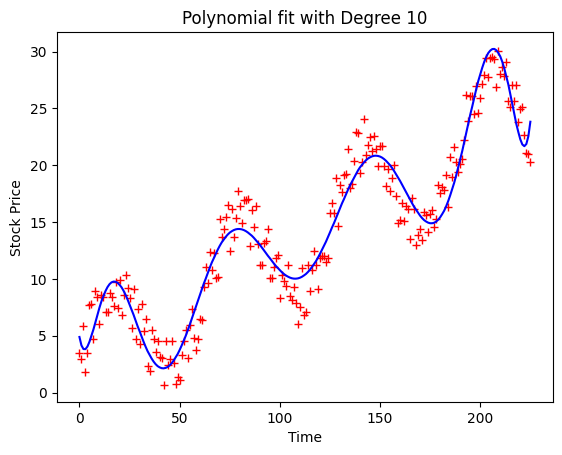

In [642]:
plt.plot(df2.x, df2.y, 'r+')
plt.plot(df2.x, yhat5, 'b-')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.title("Polynomial fit with Degree 10")
plt.show()

STOCK PRICE Conclusion


1.   SSE Linear fit with intercept - 3274
2.   SSE Linear fit without intercept - 3850
1.   SSE Sinusoidal fit - 701
2.   SSE Polynomial fit with Degree 10 - 758

###StockPrice (Interpolation and Extrapolation)

Sin model had least SSE so that will be used for Interpolation

In [712]:
# Interpolation random split of train, validate, test within range
from sklearn.model_selection import train_test_split

def split_data(df, train_size=0.7, val_size=0.15, test_size=0.15, random_state=42):

  # Initial split into train and temp set
  X_train, X_temp = train_test_split(df, test_size=1 - train_size, random_state=random_state)

  # Split temp set into validation and test sets
  val_size_adjusted = val_size / (val_size + test_size)
  X_val, X_test = train_test_split(X_temp, test_size=val_size_adjusted, random_state=random_state)

  return X_train, X_val, X_test

In [713]:
# 70-15-15 Split
train, validate, test = split_data(df)

In [714]:
train = train.sort_values(by=['x'])
validate = validate.sort_values(by=['x'])
test = test.sort_values(by=['x'])

In [715]:
train.head()

,x,y
0,0,3.48
1,1,2.99
2,2,5.86
3,3,1.79
4,4,3.47


In [716]:
# Feature transformation for Interpolation training
x1 = round(train.x*beta2[1],2)
x2 = np.sin(x1)
df22 = pd.DataFrame({"bias":np.ones(158),"x":train.x, "x1":x1, "x2":x2, "y":train.y})
df22.head(10)

,bias,x,x1,x2,y
0,1.0,0,0.00,0.000000,3.48
1,1.0,1,0.10,0.099833,2.99
2,1.0,2,0.20,0.198669,5.86
3,1.0,3,0.29,0.285952,1.79
4,1.0,4,0.39,0.380188,3.47
6,1.0,6,0.59,0.556361,7.83
7,1.0,7,0.68,0.628793,4.70
8,1.0,8,0.78,0.703279,8.97
11,1.0,11,1.08,0.881958,8.54
12,1.0,12,1.17,0.920751,8.40


In [717]:
xx = np.array(df22[['bias', 'x1', 'x2']])
yy = np.array(df22.y)

In [718]:
beta4 = estimateBeta(xx, yy)
print(beta4)
yhat6 = predict(beta4, xx)
loss = SSE(yy, yhat6)
print(loss)

[2.73558312 0.98842649 4.88208953]
510.23422645525363


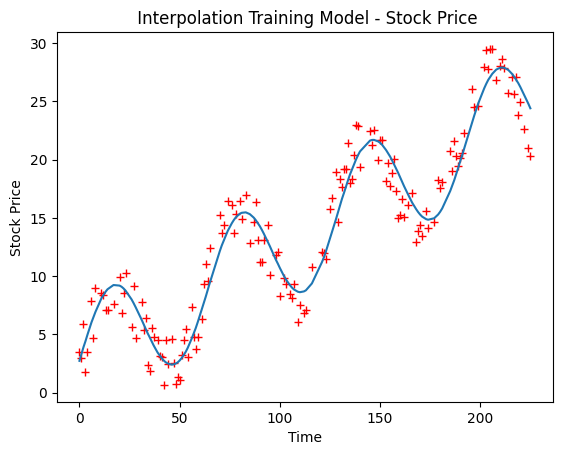

In [719]:
plt.plot(df22.x, df22.y, 'r+')
plt.plot(df22.x, yhat6)
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.title(" Interpolation Training Model - Stock Price")
plt.show()

In [720]:
validate.head()

,x,y
5,5,7.73
10,10,6.00
15,15,8.76
16,16,8.37
18,18,9.72


In [721]:
# Feature transformation for interpolation validation
x1 = round(validate.x*beta2[1],2)
x2 = np.sin(x1)
df23 = pd.DataFrame({"bias":np.ones(34),"x":validate.x, "x1":x1, "x2":x2, "y":validate.y})
df23.head(10)

,bias,x,x1,x2,y
5,1.0,5,0.49,0.470626,7.73
10,1.0,10,0.98,0.830497,6.00
15,1.0,15,1.47,0.994924,8.76
16,1.0,16,1.57,1.000000,8.37
18,1.0,18,1.76,0.982154,9.72
24,1.0,24,2.35,0.711473,9.21
29,1.0,29,2.84,0.297041,7.35
30,1.0,30,2.93,0.210017,4.28
45,1.0,45,4.40,-0.951602,2.97
68,1.0,68,6.65,0.358644,10.08


In [722]:
xv = np.array(df23[['bias', 'x1', 'x2']])
yv = np.array(df23.y)

In [723]:
yhat7 = predict(beta4, xv)
val_loss = SSE(yv, yhat7)
print(val_loss)

111.70889917763989


In [724]:
test.head()

,x,y
9,9,8.43
19,19,7.47
25,25,8.35
38,38,3.54
55,55,5.90


In [725]:
# Feature transformation for Interpolation testing
x1 = round(test.x*beta2[1],2)
x2 = np.sin(x1)
df24 = pd.DataFrame({"bias":np.ones(34),"x":test.x, "x1":x1, "x2":x2, "y":test.y})
df24.head(10)

,bias,x,x1,x2,y
9,1.0,9,0.88,0.770739,8.43
19,1.0,19,1.86,0.958471,7.47
25,1.0,25,2.45,0.637765,8.35
38,1.0,38,3.72,-0.546691,3.54
55,1.0,55,5.38,-0.785303,5.90
60,1.0,60,5.87,-0.401529,6.45
66,1.0,66,6.46,0.175895,10.81
67,1.0,67,6.55,0.263660,12.29
69,1.0,69,6.75,0.450044,10.19
75,1.0,75,7.34,0.870794,12.48


In [726]:
xt = np.array(df24[['bias', 'x1', 'x2']])
yt = np.array(df24.y)

In [727]:
yhat8 = predict(beta4, xt)
test_loss = SSE(yt, yhat8)
print(test_loss)

85.0752140947301


Visualizing Interpolation Model - Stock Price

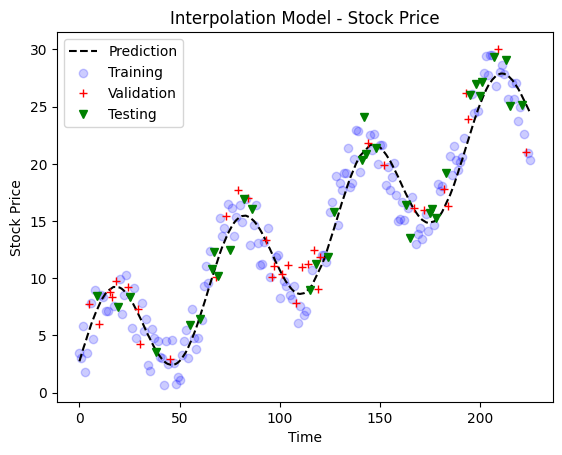

In [728]:
plt.plot(df22.x, yhat6, "k--")
plt.scatter(df22.x, df22.y, c= "b",alpha = 0.2)
plt.plot(df23.x, df23.y, 'r+')
plt.plot(df24.x, df24.y, "gv")
plt.legend(["Prediction","Training", "Validation", "Testing"])
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.title("Interpolation Model - Stock Price")
plt.show()

Interpolation Stock Price Results

1.   SSE Training set - 510
1.   SSE Validation set - 111
2.   SSE Training set - 85

Extrapolation - Stock Price

The Sinousudial model exhibitted best SSE, Thus that is used for forecasting.

In [729]:
# 70 - 15 - 15 split
# 70 Percent of the rows from the centre of the dataset is used for training
# Remaining data from start and end is sampled randomly in validation and testing set for forecasting
train = df.iloc[34:192]
temp1 = df.iloc[0:34]
temp2 = df.iloc[192:226]
temp3 = pd.concat([temp1, temp2])
validate,test = train_test_split(temp3, test_size=0.5, random_state=42)
validate = validate.sort_values(by=['x'])
test = test.sort_values(by=['x'])

In [730]:
train.head()

,x,y
34,34,2.37
35,35,1.86
36,36,5.52
37,37,4.74
38,38,3.54


In [731]:
# Feature transfromation for Extrapolation Training
x1 = round(train.x*beta2[1],2)
x2 = np.sin(x1)
df31 = pd.DataFrame({"bias":np.ones(158),"x":train.x, "x1":x1, "x2":x2, "y":train.y})
df31.head(10)

,bias,x,x1,x2,y
34,1.0,34,3.33,-0.187295,2.37
35,1.0,35,3.42,-0.274825,1.86
36,1.0,36,3.52,-0.369441,5.52
37,1.0,37,3.62,-0.460366,4.74
38,1.0,38,3.72,-0.546691,3.54
39,1.0,39,3.82,-0.627554,4.50
40,1.0,40,3.91,-0.694991,3.12
41,1.0,41,4.01,-0.763301,3.06
42,1.0,42,4.11,-0.823984,0.67
43,1.0,43,4.21,-0.876435,4.52


In [732]:
xx = np.array(df31[['bias', 'x1', 'x2']])
yy = np.array(df31.y)

In [733]:
beta5 = estimateBeta(xx, yy)
print(beta5)
yhat9 = predict(beta5, xx)
train_loss = SSE(yy, yhat9)
print(train_loss)

[2.88463745 0.9912806  4.8522333 ]
454.8453124287366


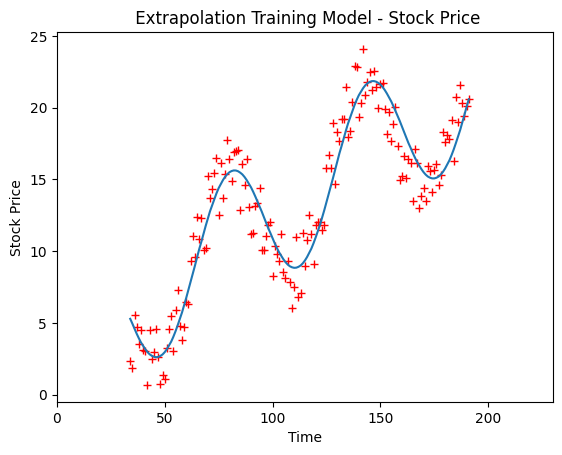

In [734]:
plt.plot(df31.x, df31.y, 'r+')
plt.plot(df31.x, yhat9)
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.title(" Extrapolation Training Model - Stock Price")
plt.xlim(0,230)
plt.show()

In [735]:
# Feature transfromation for Extrapolation Validation
x1 = round(validate.x*beta2[1],2)
x2 = np.sin(x1)
df32 = pd.DataFrame({"bias":np.ones(34),"x":validate.x, "x1":x1, "x2":x2, "y":validate.y})
df32.head()

,bias,x,x1,x2,y
1,1.0,1,0.10,0.099833,2.99
2,1.0,2,0.20,0.198669,5.86
6,1.0,6,0.59,0.556361,7.83
10,1.0,10,0.98,0.830497,6.00
11,1.0,11,1.08,0.881958,8.54


In [736]:
xv = np.array(df32[['bias', 'x1', 'x2']])
yv = np.array(df32.y)

In [737]:
yhat10 = predict(beta5, xv)
val_loss = SSE(yv, yhat10)
print(val_loss)

135.51128111515672


In [738]:
# Feature transfromation for Extrapolation testing
x1 = round(test.x*beta2[1],2)
x2 = np.sin(x1)
df33 = pd.DataFrame({"bias":np.ones(34),"x":test.x, "x1":x1, "x2":x2, "y":test.y})
df33.head()

,bias,x,x1,x2,y
0,1.0,0,0.00,0.000000,3.48
3,1.0,3,0.29,0.285952,1.79
4,1.0,4,0.39,0.380188,3.47
5,1.0,5,0.49,0.470626,7.73
7,1.0,7,0.68,0.628793,4.70


In [739]:
xt = np.array(df33[['bias', 'x1', 'x2']])
yt = np.array(df33.y)

In [740]:
yhat11 = predict(beta5, xt)
test_loss = SSE(yt, yhat11)
print(test_loss)

112.27821521490921


In [741]:
# Forecast for whole range
x1 = round(df.x*beta2[1],2)
x2 = np.sin(x1)
df34 = pd.DataFrame({"bias":np.ones(226),"x":df.x, "x1":x1, "x2":x2, "y":df.y})
xx = np.array(df34[['bias', 'x1', 'x2']])
yy = np.array(df34.y)
yhat12 = predict(beta5, xx)
ext_loss = SSE(yy, yhat12)
print(ext_loss)

702.6348087588025


Visualizing Extrapolation Model - Stock Price

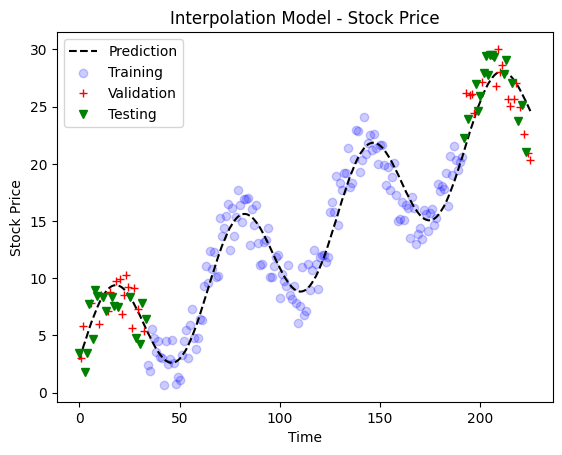

In [742]:
plt.plot(df34.x, yhat12, "k--")
plt.scatter(df31.x, df31.y, c= "b",alpha = 0.2)
plt.plot(df32.x, df32.y, 'r+')
plt.plot(df33.x, df33.y, "gv")
plt.legend(["Prediction","Training", "Validation", "Testing" ])
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.title("Interpolation Model - Stock Price")
plt.show()

Extrapolation Stock Price Results

1.   SSE Training set - 454
1.   SSE Validation set - 135
2.   SSE Testing set - 112
1.   Total SSE (Forecasting Model) - 702

#Task 3

Repeating task 2 for Spring Position data. (Horizontal Oscillation)

In [674]:
df2 = pd.DataFrame({"x":range(226), "y":data.SpringPos})
df2.head()

,x,y
0,0,2.27
1,1,6.38
2,2,8.61
3,3,8.65
4,4,13.17


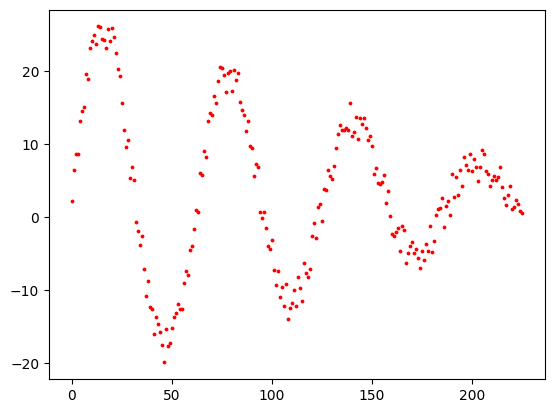

In [675]:
plt.scatter(df2.x,df2.y, c='r', s=3)
plt.show()

### Part 1

Implementing Appropiate Mathematical regression model for Spring Position data

Plot Above shows two characterstics

1.   Peroidicity (Sin wave)
2.   Amplitude of wave is decreasing with time



Approximately, 3.5 cycles of sin are  completed.

1.   Transformation 1 is scaling x by angular frequency of wave  x1 --> (3.5 * 2Pi / 226) * x
2.   Transformation 2 is introducing peroidicity by Sin function x2 --> sin(x1)  
1.   Transformation 3 is reduction of sin wave with respect to time x3 --> x*x2

1.   The Coefficient obtained for feature x3 must be less than 0, if yes, then the dampening property will be captured efficiently






Our final model will have equation --> y = b + m1x1 + m2x2 + m3x3

In [676]:
x1 = 3.5 * 2*np.pi * df2['x']/226
x2 = np.sin(1.02*x1) # Scaled the frequency of Sin wave as with time spring dampening is quicker
x3 = 1.3*x1*x2 # Scaled Amplitude of sin wave to efficiently map data points farther from crests and troughs

In [677]:
# We will also add bias term for obtaining intercept of our model
df2=pd.DataFrame({'bias':np.ones(226),'x':range(226), 'x1': x1, 'x2':x2, 'x3':x3, 'y':data['SpringPos']})

In [678]:
df2.head(10)

,bias,x,x1,x2,x3,y
0,1.0,0,0.000000,0.000000,0.000000,2.27
1,1.0,1,0.097306,0.099089,0.012535,6.38
2,1.0,2,0.194612,0.197203,0.049891,8.61
3,1.0,3,0.291918,0.293376,0.111334,8.65
4,1.0,4,0.389224,0.386661,0.195647,13.17
5,1.0,5,0.486530,0.476140,0.301153,14.52
6,1.0,6,0.583836,0.560933,0.425741,15.12
7,1.0,7,0.681142,0.640205,0.566891,19.62
8,1.0,8,0.778448,0.713175,0.721720,18.91
9,1.0,9,0.875754,0.779125,0.887018,23.17


In [679]:
xx = np.array(df2[['bias', 'x1', 'x2', 'x3']])
yy = np.array(df2.y)

In [680]:
weights = estimateBeta(xx, yy)
ycap = predict(weights, xx)
loss = SSE(yy, ycap)
print("Coefficients: ", weights)
print("SSE:", loss)

Coefficients:  [ 2.71669330e+00 -1.37605500e-02  2.48263952e+01 -7.88529166e-01]
SSE: 571.808832069376


As expected the coefficient of feature x3 is negative to capture dampening property of Sin wave

Text(0.5, 0, 'Time')

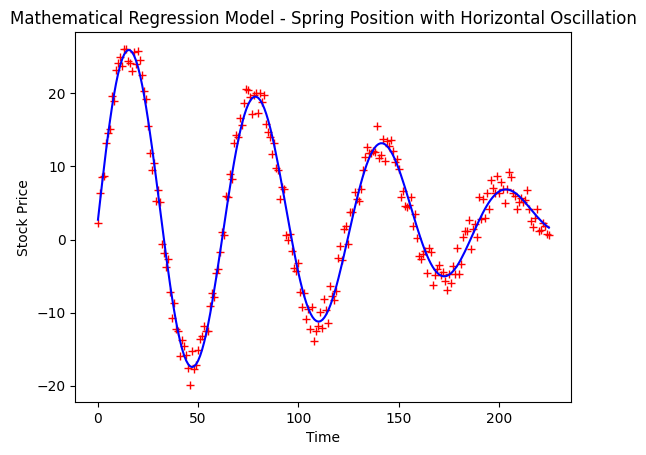

In [681]:
plt.plot(df2.x, df2.y, 'r+')
plt.plot(df2.x, ycap, 'b-')
plt.title("Mathematical Regression Model - Spring Position with Horizontal Oscillation")
plt.ylabel('Stock Price')
plt.xlabel('Time')

Reported SSE for this Mathematical regression model is 571.80

### Part 2

Interpolation and Extrapolation for Spring Position Data

I) Interpolation - Spring Position

In [682]:
# 70-15-15 Split
train, validate, test = split_data(df2)

In [683]:
train = train.sort_values(by=['x'])
validate = validate.sort_values(by=['x'])
test = test.sort_values(by=['x'])

In [684]:
train.head(10)

,bias,x,x1,x2,x3,y
0,1.0,0,0.000000,0.000000,0.000000,2.27
1,1.0,1,0.097306,0.099089,0.012535,6.38
2,1.0,2,0.194612,0.197203,0.049891,8.61
3,1.0,3,0.291918,0.293376,0.111334,8.65
4,1.0,4,0.389224,0.386661,0.195647,13.17
6,1.0,6,0.583836,0.560933,0.425741,15.12
7,1.0,7,0.681142,0.640205,0.566891,19.62
8,1.0,8,0.778448,0.713175,0.721720,18.91
11,1.0,11,1.070366,0.887445,1.234858,24.96
12,1.0,12,1.167672,0.928749,1.409817,23.72


In [685]:
xx = np.array(train[['bias', 'x1', 'x2', 'x3']])
yy = np.array(train.y)

In [686]:
weights2 = estimateBeta(xx, yy)
ycap2 = predict(weights2, xx)
loss = SSE(yy, ycap2)
print("SSE:", loss)

SSE: 427.39141065166575


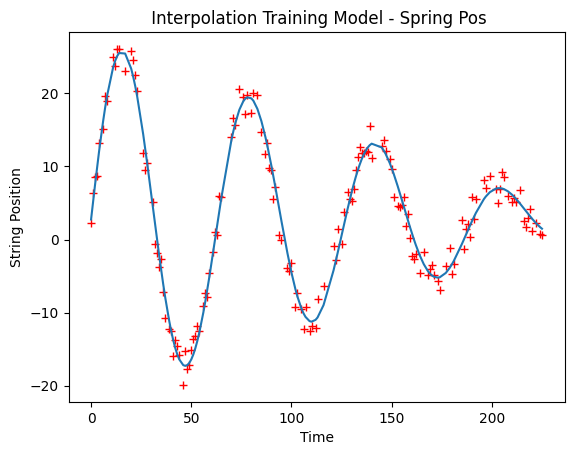

In [687]:
plt.plot(train.x, train.y, 'r+')
plt.plot(train.x, ycap2)
plt.ylabel('String Position')
plt.xlabel('Time')
plt.title(" Interpolation Training Model - Spring Pos")
plt.show()

In [688]:
validate.head(10)

,bias,x,x1,x2,x3,y
5,1.0,5,0.486530,0.476140,0.301153,14.52
10,1.0,10,0.973060,0.837406,1.059300,24.17
15,1.0,15,1.459590,0.996639,1.891088,24.40
16,1.0,16,1.556895,0.999851,2.023663,24.21
18,1.0,18,1.751507,0.976818,2.224175,25.71
24,1.0,24,2.335343,0.688590,2.090522,19.27
29,1.0,29,2.821873,0.260251,0.954714,5.32
30,1.0,30,2.919179,0.163295,0.619695,6.80
45,1.0,45,4.378769,-0.969883,-5.520963,-17.53
68,1.0,68,6.616806,0.449278,3.864617,13.22


In [689]:
xx = np.array(validate[['bias', 'x1', 'x2', 'x3']])
yy = np.array(validate.y)

In [690]:
ycap3 = predict(weights2, xx)
loss = SSE(yy, ycap3)
print("SSE:", loss)

SSE: 90.54265832526549


In [691]:
test.head(10)

,bias,x,x1,x2,x3,y
9,1.0,9,0.875754,0.779125,0.887018,23.17
19,1.0,19,1.848813,0.950798,2.285204,24.06
25,1.0,25,2.432649,0.613346,1.939673,15.58
38,1.0,38,3.697627,-0.589134,-2.831917,-8.69
55,1.0,55,5.351828,-0.734087,-5.107317,-12.54
60,1.0,60,5.838358,-0.322207,-2.445509,-3.98
66,1.0,66,6.422194,0.264275,2.206395,9.00
67,1.0,67,6.519500,0.358541,3.038760,8.23
69,1.0,69,6.714112,0.535592,4.674832,14.31
75,1.0,75,7.297948,0.917091,8.700745,20.42


In [692]:
xx = np.array(test[['bias', 'x1', 'x2', 'x3']])
yy = np.array(test.y)

In [693]:
weights2 = estimateBeta(xx, yy)
ycap4 = predict(weights2, xx)
loss = SSE(yy, ycap4)
print("SSE:", loss)

SSE: 52.90754458865555


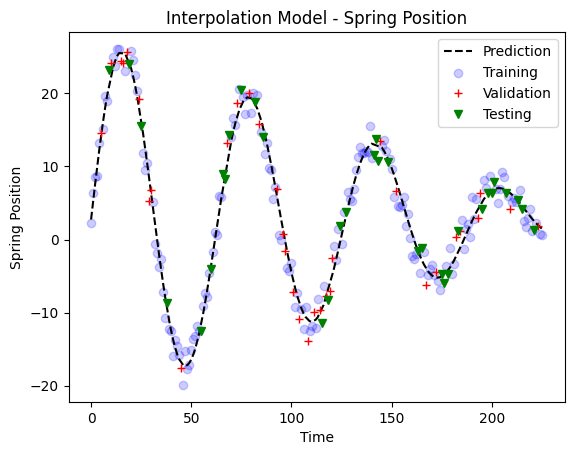

In [694]:
plt.plot(train.x, ycap2, "k--")
plt.scatter(train.x, train.y, c= "b",alpha = 0.2)
plt.plot(validate.x, validate.y, 'r+')
plt.plot(test.x, test.y, "gv")
plt.legend(["Prediction","Training", "Validation", "Testing"])
plt.ylabel('Spring Position')
plt.xlabel('Time')
plt.title("Interpolation Model - Spring Position")
plt.show()

Interpolation Spring Position Results

1.   SSE Training set - 427.39
2.   SSE Validation set - 90.54
1.   SSE Training set - 52.90




II) Extrapolation - Spring Position Data

In [695]:
train = df2.iloc[34:192]
temp1 = df2.iloc[0:34]
temp2 = df2.iloc[192:226]
temp3 = pd.concat([temp1, temp2])
validate,test = train_test_split(temp3, test_size=0.5, random_state=42)
validate = validate.sort_values(by=['x'])
test = test.sort_values(by=['x'])

In [696]:
train.head()

,bias,x,x1,x2,x3,y
34,1.0,34,3.308403,-0.230876,-0.992982,-3.77
35,1.0,35,3.405709,-0.326152,-1.444013,-2.60
36,1.0,36,3.503015,-0.418218,-1.904530,-7.16
37,1.0,37,3.600321,-0.506167,-2.369073,-10.78
38,1.0,38,3.697627,-0.589134,-2.831917,-8.69


In [697]:
xx = np.array(train[['bias', 'x1', 'x2', 'x3']])
yy = np.array(train.y)

In [698]:
weights3 = estimateBeta(xx, yy)
ycap5 = predict(weights3, xx)
loss = SSE(yy, ycap5)
print("SSE:", loss)

SSE: 427.3880535189609


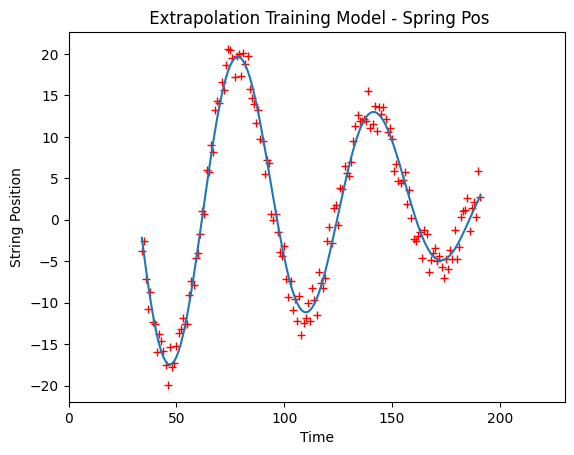

In [699]:
plt.plot(train.x, train.y, 'r+')
plt.plot(train.x, ycap5)
plt.ylabel('String Position')
plt.xlabel('Time')
plt.title(" Extrapolation Training Model - Spring Pos")
plt.xlim(0,230)
plt.show()

In [700]:
validate.head(10)

,bias,x,x1,x2,x3,y
1,1.0,1,0.097306,0.099089,0.012535,6.38
2,1.0,2,0.194612,0.197203,0.049891,8.61
6,1.0,6,0.583836,0.560933,0.425741,15.12
10,1.0,10,0.973060,0.837406,1.059300,24.17
11,1.0,11,1.070366,0.887445,1.234858,24.96
14,1.0,14,1.362284,0.983616,1.741953,26.09
15,1.0,15,1.459590,0.996639,1.891088,24.40
18,1.0,18,1.751507,0.976818,2.224175,25.71
20,1.0,20,1.946119,0.915420,2.315972,25.86
21,1.0,21,2.043425,0.871032,2.313855,24.64


In [701]:
xx = np.array(validate[['bias', 'x1', 'x2', 'x3']])
yy = np.array(validate.y)

In [702]:
ycap6 = predict(weights3, xx)
loss = SSE(yy, ycap6)
print("SSE:", loss)

SSE: 86.50589965499034


In [703]:
test.head(10)

,bias,x,x1,x2,x3,y
0,1.0,0,0.000000,0.000000,0.000000,2.27
3,1.0,3,0.291918,0.293376,0.111334,8.65
4,1.0,4,0.389224,0.386661,0.195647,13.17
5,1.0,5,0.486530,0.476140,0.301153,14.52
7,1.0,7,0.681142,0.640205,0.566891,19.62
8,1.0,8,0.778448,0.713175,0.721720,18.91
9,1.0,9,0.875754,0.779125,0.887018,23.17
12,1.0,12,1.167672,0.928749,1.409817,23.72
13,1.0,13,1.264978,0.960912,1.580191,26.10
16,1.0,16,1.556895,0.999851,2.023663,24.21


In [704]:
xx = np.array(test[['bias', 'x1', 'x2', 'x3']])
yy = np.array(test.y)

In [705]:
ycap7 = predict(weights3, xx)
loss = SSE(yy, ycap7)
print("SSE:", loss)

SSE: 66.49415958893393


In [706]:
xx = np.array(df2[['bias', 'x1', 'x2', 'x3']])
yy = np.array(df2.y)

In [707]:
ycap8 = predict(weights3, xx)
loss = SSE(yy, ycap8)
print("SSE:", loss)

SSE: 580.3881127628852


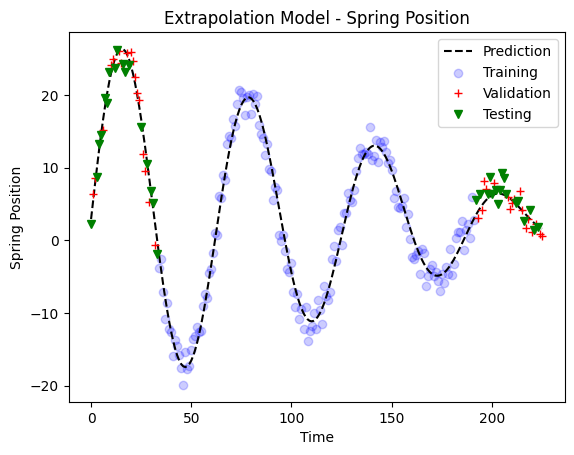

In [708]:
plt.plot(df2.x, ycap8, "k--")
plt.scatter(train.x, train.y, c= "b",alpha = 0.2)
plt.plot(validate.x, validate.y, 'r+')
plt.plot(test.x, test.y, "gv")
plt.legend(["Prediction","Training", "Validation", "Testing"])
plt.ylabel('Spring Position')
plt.xlabel('Time')
plt.title("Extrapolation Model - Spring Position")
plt.show()

Extrapolation Stock Price Results

1.   SSE Training set - 427.38
1.   SSE Validation set - 86.50
2.   SSE Testing set - 66.49
1.   Total SSE (Forecasting Model) - 580.38